In [1]:
!mkdir -p ~/.kaggle
!cp kaggle. json ~/ kaggle/

cp: target 'kaggle/' is not a directory


In [2]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zf = zipfile.ZipFile('/content/face-mask-dataset.zip')
zf.extractall('/content')
zf.close()

In [4]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from keras. layers import Dense, Conv2D,MaxPooling2D, Flatten, BatchNormalization , Dropout

In [6]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [7]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
conv_base.trainable = False

In [9]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

base_dir = '/content/data'
train_dir = '/content/data/train'
test_dir = '/content/data/test'


os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


for category in ['with_mask', 'without_mask']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

with_mask_images = os.listdir(os.path.join(base_dir, 'with_mask'))
without_mask_images = os.listdir(os.path.join(base_dir, 'without_mask'))


train_with_mask, test_with_mask = train_test_split(with_mask_images, test_size=0.2, random_state=42)
train_without_mask, test_without_mask = train_test_split(without_mask_images, test_size=0.2, random_state=42)

def move_files(file_list, source_dir, dest_dir):
    for file_name in file_list:
        source = os.path.join(source_dir, file_name)
        destination = os.path.join(dest_dir, file_name)
        shutil.move(source, destination)


move_files(train_with_mask, os.path.join(base_dir, 'with_mask'), os.path.join(train_dir, 'with_mask'))
move_files(test_with_mask, os.path.join(base_dir, 'with_mask'), os.path.join(test_dir, 'with_mask'))


move_files(train_without_mask, os.path.join(base_dir, 'without_mask'), os.path.join(train_dir, 'without_mask'))
move_files(test_without_mask, os.path.join(base_dir, 'without_mask'), os.path.join(test_dir, 'without_mask'))


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [11]:

batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/data/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/data/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 6042 images belonging to 2 classes.
Found 1511 images belonging to 2 classes.


In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/189 ━━━━━━━━━━━━━━━━━━━━ 14s 292ms/step - accuracy: 0.8394 - loss: 0.3780

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 74s 315ms/step - accuracy: 0.8617 - loss: 0.3282 - val_accuracy: 0.9669 - val_loss: 0.0885
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 49s 251ms/step - accuracy: 0.9624 - loss: 0.0902 - val_accuracy: 0.9749 - val_loss: 0.0710
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 47s 236ms/step - accuracy: 0.9762 - loss: 0.0655 - val_accuracy: 0.9682 - val_loss: 0.0767
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 84s 248ms/step - accuracy: 0.9803 - loss: 0.0593 - val_accuracy: 0.9603 - val_loss: 0.1251
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 52s 267ms/step - accuracy: 0.9823 - loss: 0.0417 - val_accuracy: 0.9768 - val_loss: 0.0835
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 82s 267ms/step - accuracy: 0.9869 - loss: 0.0377 - val_accuracy: 0.9755 - val_loss: 0.1073
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 91s 314ms/step - accuracy: 0.9887 - loss: 0.0304 - val_accuracy: 0.9742 - val_loss: 0.0709
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 49s 252ms/step - accuracy: 0.9912 - loss: 0.0293 - val

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,007,685 (80.14 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 4,195,332 (16.00 MB)

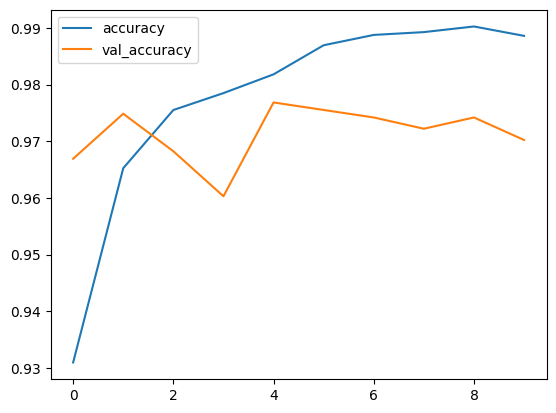

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

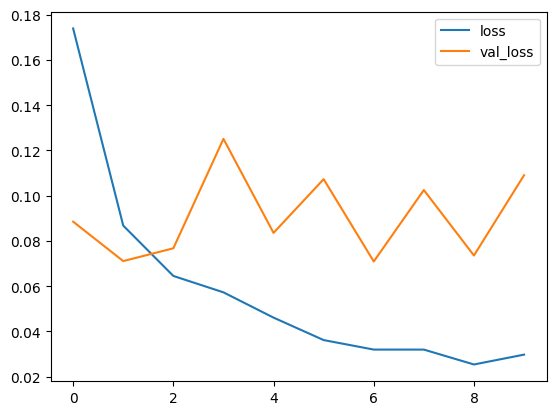

In [19]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[1.]], dtype=float32)

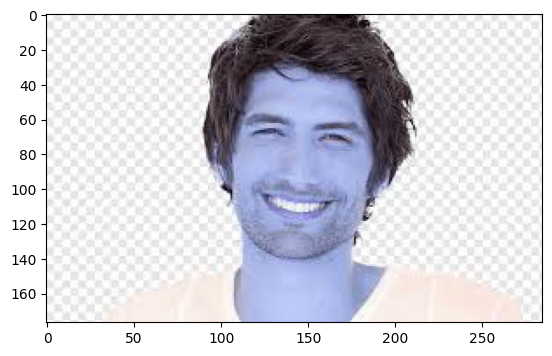

In [21]:
import cv2
import numpy as np
img2 = cv2.imread('/content/smile1.jpeg')
plt.imshow(img2)
img2 = cv2.resize(img2,(150,150))
test2 = img2.reshape((1,150,150,3))
prediction_prob1 = model.predict(test2)
prediction_prob1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.]], dtype=float32)

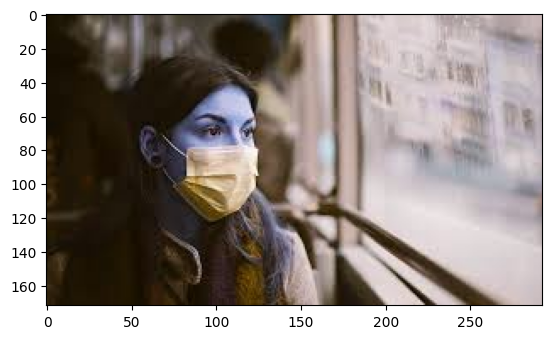

In [22]:
img2 = cv2.imread('/content/mask1.jpeg')
plt.imshow(img2)
img2 = cv2.resize(img2,(150,150))
test2 = img2.reshape((1,150,150,3))
prediction_prob1 = model.predict(test2)
prediction_prob1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[1.4336068e-06]], dtype=float32)

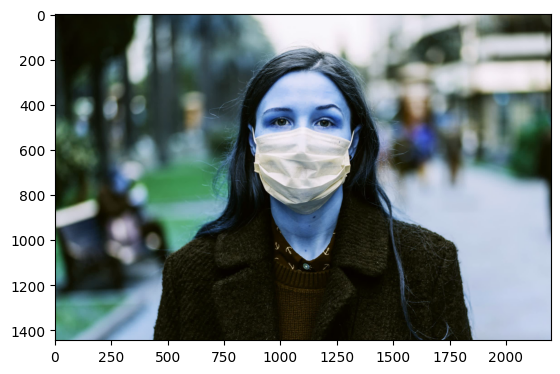

In [23]:
img2 = cv2.imread('/content/mask2.jpeg')
plt.imshow(img2)
img2 = cv2.resize(img2,(150,150))
test2 = img2.reshape((1,150,150,3))
prediction_prob1 = model.predict(test2)
prediction_prob1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


array([[0.]], dtype=float32)

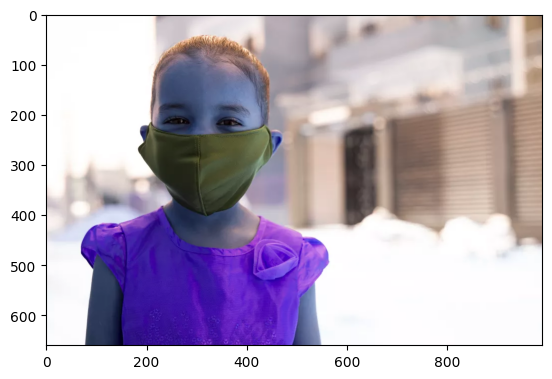

In [24]:
img2 = cv2.imread('/content/mask3.jpeg')
plt.imshow(img2)
img2 = cv2.resize(img2,(150,150))
test2 = img2.reshape((1,150,150,3))
prediction_prob1 = model.predict(test2)
prediction_prob1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[1.]], dtype=float32)

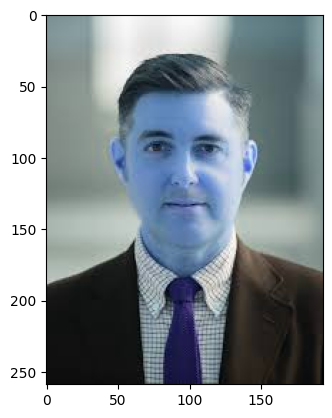

In [26]:
img2 = cv2.imread('/content/w_mask.jpeg')
plt.imshow(img2)
img2 = cv2.resize(img2,(150,150))
test2 = img2.reshape((1,150,150,3))
prediction_prob1 = model.predict(test2)
prediction_prob1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0.11800743]], dtype=float32)

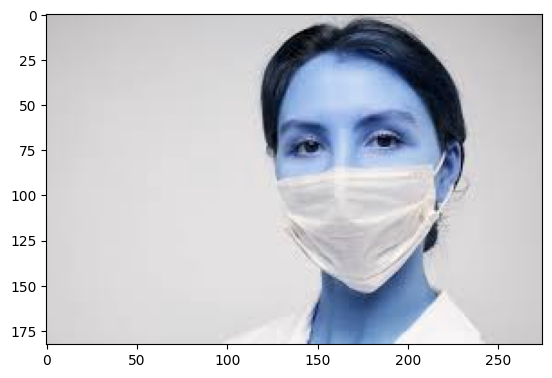

In [ ]:
imgg = cv2.imread('/content/mask5.jpeg')
plt.imshow(imgg)
imgg = cv2.resize(imgg,(256,256))
testn = imgg.reshape((1,256,256,3))
prediction_prob10 = model.predict(testn)
prediction_prob10

In [33]:
print(train_generator.class_indices)


{'with_mask': 0, 'without_mask': 1}


In [35]:
from keras.models import load_model
model.save('mw_model.h5')
from google.colab import files

# Download the saved model file
files.download('mw_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>